## Exercise 4: Model performance as a function of number of hidden neurons

### Description

Investigate how the best validation loss and accuracy depends on the number of hidden neurons in a single layer.

1. Fit a reasonable number of models with different hidden layer size (between 10 and 1000 hidden neurons) for a fixed number of epochs well beyond the point of overfitting.
2. Collect some statistics by fitting the same models as in 1. for multiple initial conditions. Hints: 1. If you don't reset the random seed, you get different initial conditions each time you create a new model. 2. Let your computer work while you are asleep.
3. Plot summary statistics of the final validation loss and accuracy versus the number of hidden neurons. Hint: [boxplots](https://matplotlib.org/examples/pylab_examples/boxplot_demo.html) (also [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html?highlight=boxplot#matplotlib.axes.Axes.boxplot)) are useful. You may also want to use the matplotlib method set_xticklabels.
4. Plot summary statistics of the loss and accuracy for early stopping versus the number of hidden neurons.

### Solution

In [221]:
initial_conditions = 10
nb_neurones = [10,100,500,750,1000]
hists = []
evals = []
for nb in nb_neurones:
    model_hists = []
    model_eval = []
    for i in range(initial_conditions):
        tmp = Sequential([
            Dense(nb, input_shape=(256,), activation='relu'),
            Dense(5, activation='softmax')
        ])
        tmp.compile(loss = "categorical_crossentropy",
                   optimizer = Adam(),
                   metrics=['accuracy'])
        h = tmp.fit(x_train, y_train,
           batch_size= 128,
           epochs=200,
           verbose=0,
           validation_data=(x_test, y_test))
        e = tmp.evaluate(x_test, y_test, verbose=0)
        model_hists.append(h)
        model_eval.append(e)
    hists.append(model_hists)
    evals.append(model_eval)
        

In [234]:
val_accs = []
val_loss = []
for i in range(len(nb_neurones)):
    val_accs.append([x[1] for x in evals[i]])
    val_loss.append([x[0] for x in evals[i]])
    

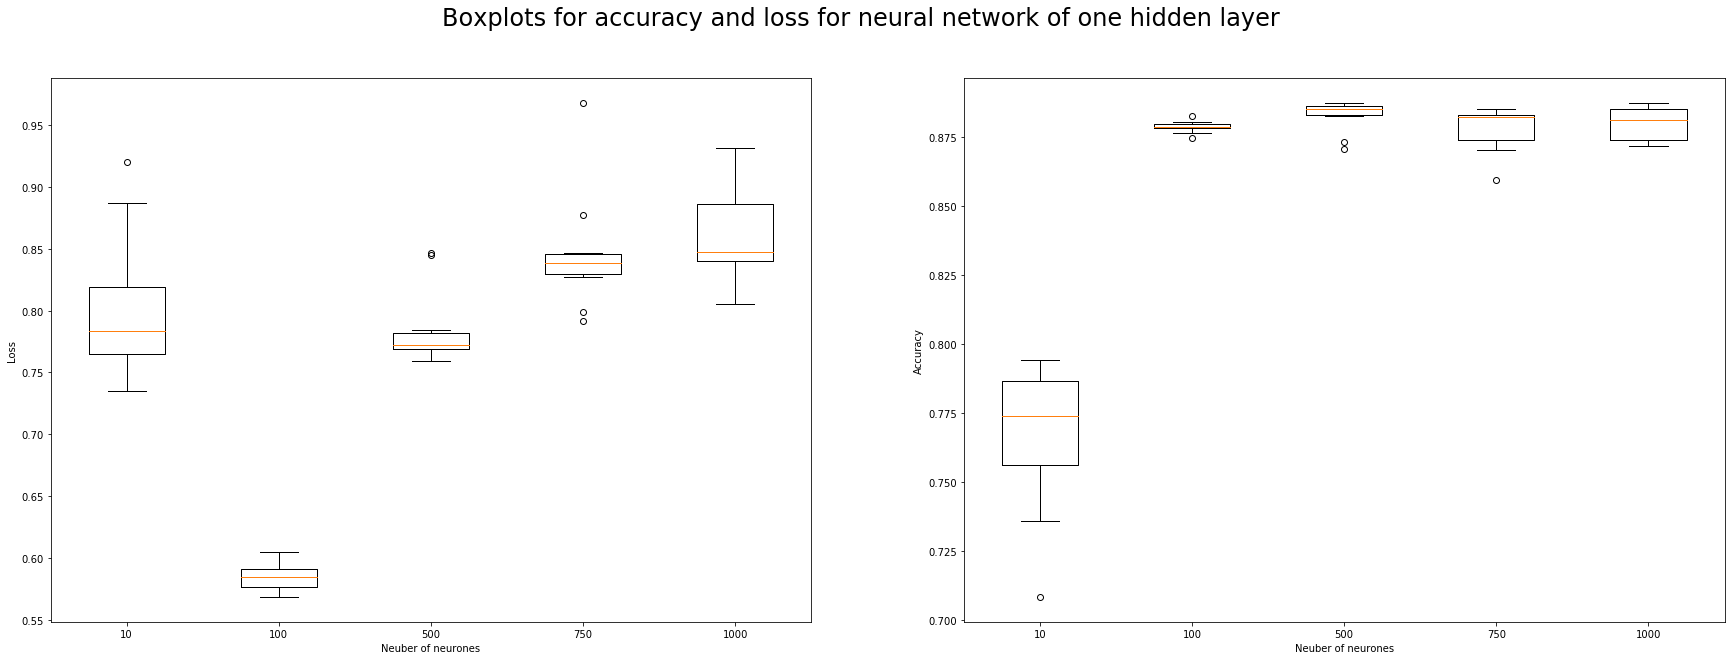

In [244]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(30,10))
    #plt.subplot(1,1)
ax1.boxplot(val_loss)
ax1.set_xticklabels(nb_neurones)
ax1.set_xlabel("Neuber of neurones")
ax1.set_ylabel("Loss")
    #fig1, ax2 = plt.subplots()
ax2.boxplot(val_accs)
ax2.set_xticklabels(nb_neurones)
ax2.set_xlabel("Neuber of neurones")
ax2.set_ylabel("Accuracy")
fig.suptitle("Boxplots for accuracy and loss for neural network of one hidden layer".format(n), fontsize=24)
plt.show()

In [222]:
initial_conditions = 10
nb_neurones = [10,100,500,750,1000]
hists_ES = []
evals_ES = []
for nb in nb_neurones:
    model_hists = []
    model_eval = []
    for i in range(initial_conditions):
        tmp = Sequential([
            Dense(nb, input_shape=(256,), activation='relu'),
            Dense(5, activation='softmax')
        ])
        tmp.compile(loss = "categorical_crossentropy",
                   optimizer = Adam(),
                   metrics=['accuracy'])
        callback = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')]
        h = tmp.fit(x_train, y_train,
           batch_size= 128,
           epochs=200,
           verbose=0,
           callbacks=callback,
           validation_data=(x_test, y_test))
        e = tmp.evaluate(x_test, y_test, verbose=0)
        model_hists.append(h)
        model_eval.append(e)
    hists_ES.append(model_hists)
    evals_ES.append(model_eval)

In [249]:
# With early stopping
val_accs_ES = []
val_loss_ES = []
for i in range(len(nb_neurones)):
    val_accs_ES.append([x[1] for x in evals_ES[i]])
    val_loss_ES.append([x[0] for x in evals_ES[i]])

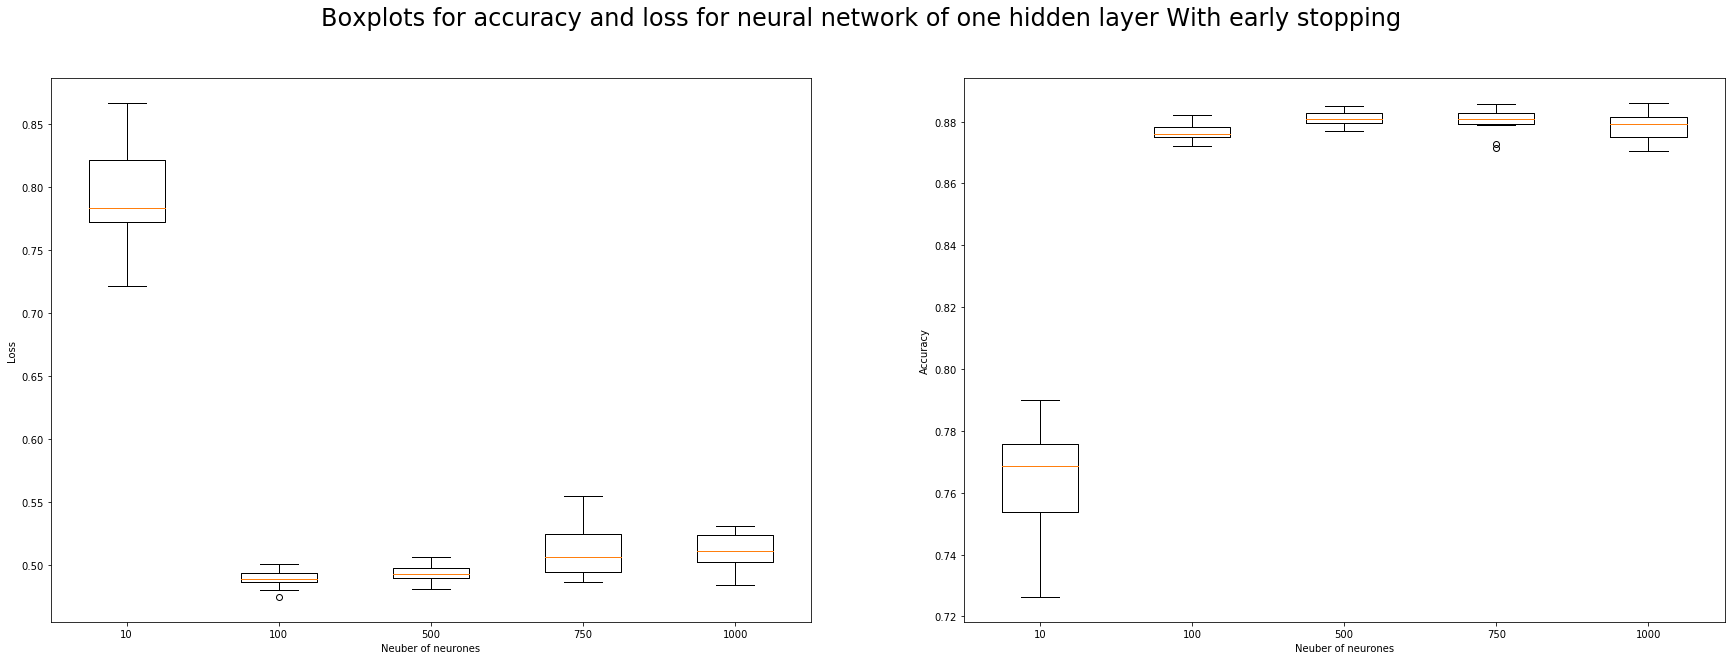

In [250]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(30,10))
    #plt.subplot(1,1)
ax1.boxplot(val_loss_ES)
ax1.set_xticklabels(nb_neurones)
ax1.set_xlabel("Neuber of neurones")
ax1.set_ylabel("Loss")
    #fig1, ax2 = plt.subplots()
ax2.boxplot(val_accs_ES)
ax2.set_xticklabels(nb_neurones)
ax2.set_xlabel("Neuber of neurones")
ax2.set_ylabel("Accuracy")
fig.suptitle("Boxplots for accuracy and loss for neural network of one hidden layer With early stopping".format(n), fontsize=24)
plt.show()